In [18]:
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os,gzip,pickle
from keys import Cols
# 设置字体
matplotlib.rcParams['font.family'] = 'Microsoft YaHei, Times New Roman'
# 全局设置字号
plt.rcParams.update({
    'font.size': 20,  # 基础字号
    'axes.titlesize': 20,  # 标题字号
    'axes.labelsize': 20,  # 坐标轴标签字号
    'xtick.labelsize': 20,  # x轴刻度标签字号
    'ytick.labelsize': 20,  # y轴刻度标签字号
    'legend.fontsize': 18  # 图例字号
})
# 解决负号显示问题
matplotlib.rcParams['axes.unicode_minus'] = False

In [43]:
with gzip.open(
    r'D:\Devs\Single_Stack_MLJ\data\processed\Static_Model_Verification_without_model-1# gzip',
    'rb'
) as f:
    df_without_model = pickle.load(f)

In [32]:
max_lye_flow = df_without_model[Cols.lye_flow].max()
min_lye_flow = df_without_model[Cols.lye_flow].min()
df_without_model[Cols.lye_flow] = (df_without_model[Cols.lye_flow] - min_lye_flow) / ((max_lye_flow - min_lye_flow) / 0.02) + 0.32

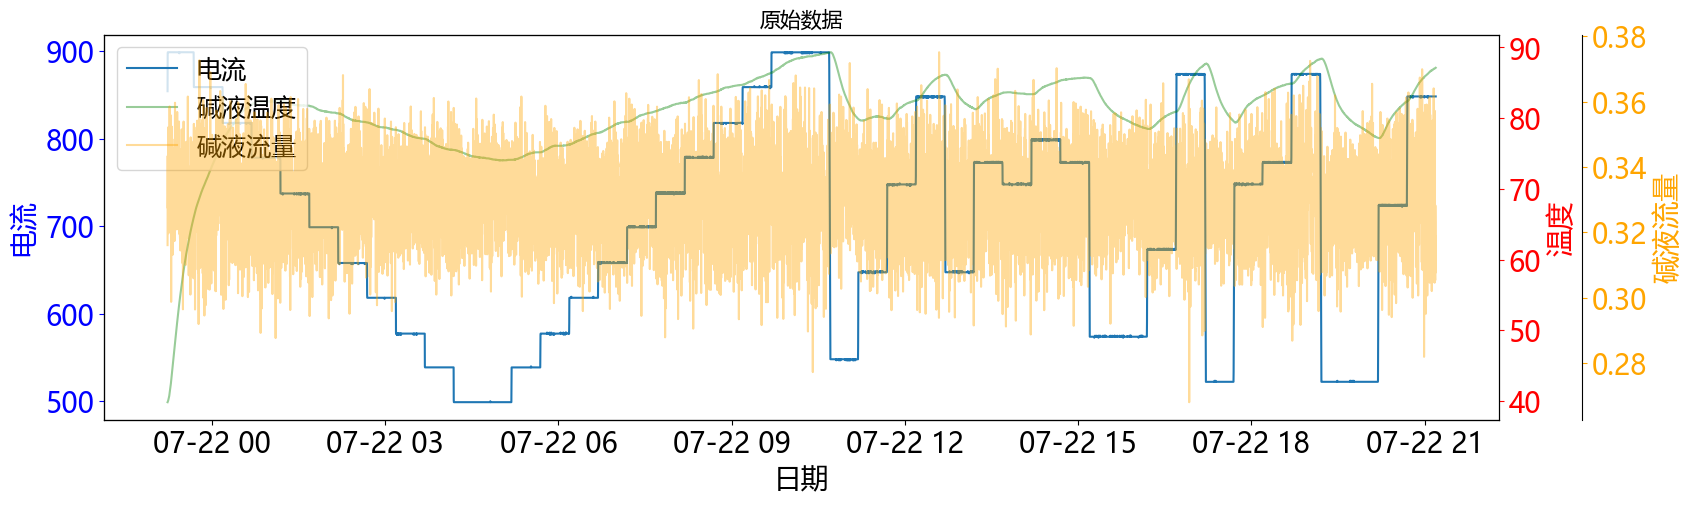

In [44]:
# 创建图表和子图
fig, ax1 = plt.subplots(figsize=(18, 5))
plt.title('原始数据', fontsize = 15)

# 绘制第一个因变量的曲线
ax1.plot(df_without_model[Cols.date_time],df_without_model[Cols.current], label = '电流')
ax1.set_xlabel('日期')
ax1.set_ylabel('电流', color='b')
ax1.tick_params('y', colors='b')

# 创建第二个y轴
ax2 = ax1.twinx()

# 绘制第二个因变量的曲线
ax2.plot(df_without_model[Cols.date_time],df_without_model[Cols.temp_out], c = 'green', alpha = 0.4, label = '碱液温度')
ax2.set_ylabel('温度', color='r')
ax2.tick_params('y', colors='r')

# 创建第三个y轴
ax3 = ax1.twinx()

# 绘制第三个因变量的曲线
ax3.plot(df_without_model[Cols.date_time],df_without_model[Cols.lye_flow], c = 'orange', alpha = 0.4, label = '碱液流量')
ax3.set_ylabel('碱液流量', color='orange')
ax3.spines['right'].set_position(('outward', 60))
ax3.tick_params('y', colors='orange')

# 添加图例
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left')

# 显示图表
plt.show()

In [37]:
with gzip.open(
    r'D:\Devs\Single_Stack_MLJ\data\processed\Static_Model_Verification_with_model-1# gzip',
    'rb'
) as f:
    df_with_model = pickle.load(f)

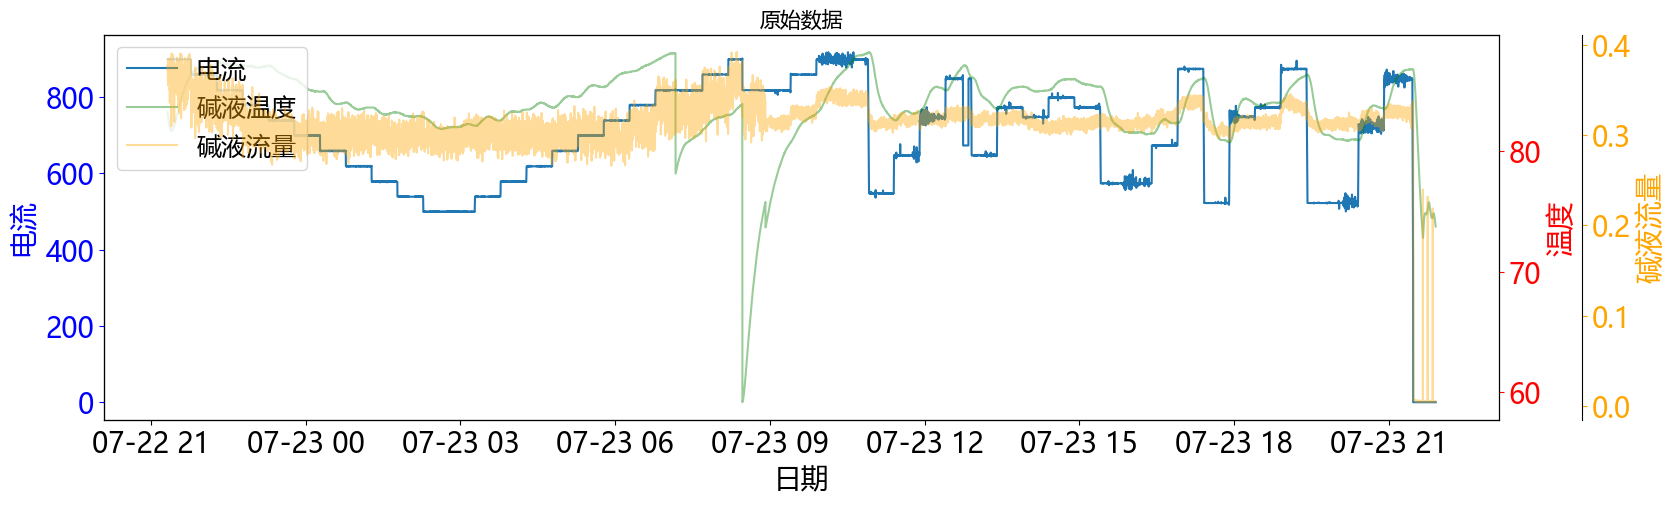

In [39]:
# 创建图表和子图
fig, ax1 = plt.subplots(figsize=(18, 5))
plt.title('原始数据', fontsize = 15)

# 绘制第一个因变量的曲线
ax1.plot(df_with_model[Cols.date_time],df_with_model[Cols.current], label = '电流')
ax1.set_xlabel('日期')
ax1.set_ylabel('电流', color='b')
ax1.tick_params('y', colors='b')

# 创建第二个y轴
ax2 = ax1.twinx()

# 绘制第二个因变量的曲线
ax2.plot(df_with_model[Cols.date_time],df_with_model[Cols.temp_out], c = 'green', alpha = 0.4, label = '碱液温度')
ax2.set_ylabel('温度', color='r')
ax2.tick_params('y', colors='r')

# 创建第三个y轴
ax3 = ax1.twinx()

# 绘制第三个因变量的曲线
ax3.plot(df_with_model[Cols.date_time],df_with_model[Cols.lye_flow], c = 'orange', alpha = 0.4, label = '碱液流量')
ax3.set_ylabel('碱液流量', color='orange')
ax3.spines['right'].set_position(('outward', 60))
ax3.tick_params('y', colors='orange')

# 添加图例
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left')

# 显示图表
plt.show()

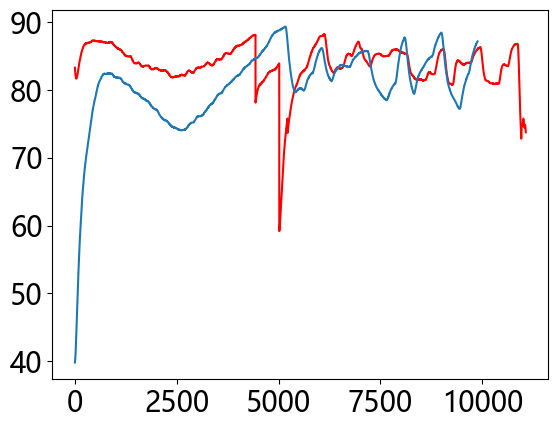

In [42]:
plt.plot(df_with_model[Cols.temp_out], c='r')
plt.plot(df_without_model[Cols.temp_out])